<a href="https://colab.research.google.com/github/omkardesai555/TED-TALKS-Views-Prediction-with-Regression/blob/main/Ted_Talk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TED TALKS Views Prediction**

##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Viraj Desai
##### **Team Member 2 -** Omkar Desai



****
TED stands for Technology, Entertainment and Design.

A TED talk refers to a recorded public-speaking presentation that was originally given at the main TED (technology, entertainment and design) annual event or one of its many satellite events around the world. TED is a nonprofit devoted to spreading ideas, usually in the form of short, powerful talks, often called "TED talks." These could be a motivational video, awareness, technical, Science entertainment, or any other genre.


TED is devoted to spreading powerful ideas on just about any topic. Founded in 1984 by Richard Salman as a nonprofit organization
that aimed at bringing experts from the fields of Technology, Entertainment, and Design
together, TED Conferences have gone on to become the Mecca of ideas from virtually all
walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000
talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore,
Jimmy Wales, Shahrukh Khan, and Bill Gates.

# **GitHub Link -**

##**Objective**
****
The main objective is to build a predictive model, which could help in predicting the views of
the videos uploaded on the TEDx website.

##**Importing Neccessary Libraries**

In [ ]:
# Importing data visualization libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing data manipulation libraries.
import pandas as pd
import numpy as np

# Datatime library for Date columns.
from datetime import datetime
import datetime as dt
from operator import itemgetter

# Importing preprocessing libraries.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Importing model selection libraries.
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# importing XGB regressor.
from xgboost import XGBRegressor

# Import metrics libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Importing graphviz for visualizing decision trees.
import graphviz
import sklearn.tree as tree

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')


##**Data Gathering and Discovery**
***

Now in this section we will import our dataset and do some basic operations to see what sort of data that we have and what all attributes are there along with the dependent variable(views).

In [ ]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# The variable Data_path contains the path of dataset stored in drive.
Data_path = "/content/drive/MyDrive/Almabetter/CapstoneProject/CapstoneProject1/"

# Importing TED Talks Data File.
Ted_talks = pd.read_csv(Data_path + "data_ted_talks .csv")

In [ ]:
# first 5 rows of data.
Ted_talks.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


**Attributes and their Description:-**

talk_id : Talk identification number provided by TED


* title : Title of the talk

* speaker_1 : First speaker in TED's speaker list


* speakers : Speakers in the talk

* occupations : Occupations of the speakers

* about_speakers : Blurb about each speaker

* **views(Dependent Variable)** : Count of views

* recorded_date : Date the talk was recorded

* published_date : Date the talk was published to TED.com

* event : Event or medium in which the talk was given

* native_lang : Language the talk was given in

* available_lang : All available languages (lang_code) for a talk

* comments : Count of comments

* duration : Duration in seconds

* topics : Related tags or topics for the talk

* related_talks : Related talks (key='talk_id', value='title')

* url URL of the talk

* description : Description of the talk

* transcript : Full transcript of the talk

In [ ]:
# Describe the numeric columns in the dataset.
Ted_talks.describe().T

,count,mean,std,min,25%,50%,75%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,1252.0,2333.0,23777.0,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,882069.0,1375508.0,2133110.0,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,38.0,89.0,188.0,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,393.0,738.0,974.0,3922.0


In [ ]:
# Brief info about the type and null counts in data.
Ted_talks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

We can see there's a lot of null values available in the data, specially in columns like comments, occupations and about_speakers, the numbers are very high. Lets do null counts to be clear on this.

In [ ]:
# NaN or null counts for each column.
Ted_talks.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

##**EDA on TED Talks Dataset**
***
Exploratory data analysis or commonly known as EDA helps to explore data, and possibly formulate hypothesis that might cause new data collection and experiments. EDA build a robust understanding of the data, issues associated with either the info or process. it’s a scientific approach to get the **story of the data**.

It focuses more narrowly on checking assumptions required for model fitting and hypothesis testing. It also helps while handling missing values and making transformations of variables as needed. Also we'd deal with outliers in this section. However, in this project we've made a seperate section of feature engineering for variable transformations.

Note:- For visualizations in EDA section we have used Tableau to create interactive and appealing charts rather than just some graphical representation of facts and data. Also these graphs can only be viewed in colab or jupyter notebook where the html code block could be executed. It won't display in github notebook. So it is suggested to open file in google colab.

###**Speakers**
The speaker_1 column consist the name of the speaker who has delevered the ted talk. We can use this name feature to analyse the ammount of videos a particular speaker has delevered and what are the total and average number of views pertaining to that speaker.

Below is the HTML code to import a graph from tableau server. We've uploaded our visualizations on tableau server such that it can be directly imported and seen by running the script below.

In [ ]:
# HTML script to import the tableau sheet for visualization.
%%HTML
<div class='tableauPlaceholder' id='viz1655992236730' style='position: relative'><noscript><a href='#'>
<img alt='Speakers and their respective Sum of views, duration and comments. ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA9&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
<param name='embed_code_version' value='3' />
<param name='site_root' value='' />
<param name='name' value='Ted_talks_EDA9&#47;Sheet1' />
<param name='tabs' value='no' />
<param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA9&#47;Sheet1&#47;1.png' />
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
<param name='language' value='en-US' /></object></div>
<script type='text/javascript'>
var divElement = document.getElementById('viz1655992236730');
var vizElement = divElement.getElementsByTagName('object')[0];
vizElement.style.width='90%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';
var scriptElement = document.createElement('script');
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';
vizElement.parentNode.insertBefore(scriptElement, vizElement);
</script>

From the above graph, It is clear that among all speakers **Alex Gendler** has got the highest amount of views in total. Also the total video duration is pretty high that might suggest that he has delevered multiple videos to draw such high numbers.

On the contrary though the comments for his videos are basically 0 or null. This shows the data has inconsistencies with the attributes as we have seen previously.

The comments attributes has a lot of NaN values to deal with. We have used some basic intution for what could be the reason of comments being null. The most logical explanation could be that the comments are disabled for the video. The other reason that could be possible is the data inconsistency so there could be some issues with the survey that are possibly causing these inconsistencies. We'll deal with these NaN values later on.

Some other big names like **Sir Ken Robinson**, **Bill Gates** and **Amy Cuddy** are also there among the top speakers with most number of views. This can easily be anticipated because those are some of the popular personalities and obviously they would attract a lot of viewers.


In [ ]:
# HTML script to import the tableau sheet for visualization.

%%HTML
<div class='tableauPlaceholder' id='viz1656149142149' style='position: relative'>
<noscript><a href='#'><img alt='Top 20 Speakers with Highest sum of views. ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA8&#47;Sheet2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
<param name='embed_code_version' value='3' /> <param name='site_root' value='' />
<param name='name' value='Ted_talks_EDA8&#47;Sheet2' />
<param name='tabs' value='no' />
<param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA8&#47;Sheet2&#47;1.png' />
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
<param name='language' value='en-US' />
</object></div>
<script type='text/javascript'>
var divElement = document.getElementById('viz1656149142149');
var vizElement = divElement.getElementsByTagName('object')[0];
vizElement.style.width='90%';vizElement.style.height='500px';
var scriptElement = document.createElement('script');
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';
vizElement.parentNode.insertBefore(scriptElement, vizElement);
</script>

The above graph shows the top 20 speakers with highest sum of views as you can see **Alex Gendler** is again at the top with most number of views followed by **Sir Ken Robinson** and **James Veitch**.

Also we can see the duration is also very high for all of these top speakers but in terms of duration Bill Gates is doing far better than top 3 speakers, that just resembles he could have had multiple Ted Talks.

We can see that Hans Rosling has the most duration that could signify he's done most amount of videos among all top speakers or that could be videos with larger length.

We could also see empty space in Alex Gendler's cell that is representing the Nan values of comments for him.

In [ ]:
# HTML script to import the tableau sheet for visualization.
%%HTML
<div class='tableauPlaceholder' id='viz1656149405447' style='position: relative'>
<noscript><a href='#'><img alt='Speakers and their respective Average of views, duration and comments. ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA5&#47;Sheet4&#47;1_rss.png' style='border: none' /></a></noscript>
<object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
<param name='embed_code_version' value='3' />
<param name='site_root' value='' />
<param name='name' value='Ted_talks_EDA5&#47;Sheet4' />
<param name='tabs' value='no' />
<param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA5&#47;Sheet4&#47;1.png' />
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
<param name='language' value='en-US' /></object></div>
<script type='text/javascript'>
var divElement = document.getElementById('viz1656149405447');
var vizElement = divElement.getElementsByTagName('object')[0];
vizElement.style.width='90%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';
var scriptElement = document.createElement('script');
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';
vizElement.parentNode.insertBefore(scriptElement, vizElement);
</script>

From the above graph, it is clear that **Amy Cuddy** has the most number of average views among all of the speakers followed by **James Veitch** and **Tim Urban**.

Also we can see that Amy Cuddy and James Veitch were both in the sum of views and the average of views graphs, so it is clear that they are the most popular ones among all of the speakers.

Also the comments average for Amy Cuddy is pretty high along with the consistent average duration. This shows he has recieved great feedback from the viewers too.

In [ ]:
# HTML script to import the tableau sheet for visualization.

%%HTML
<div class='tableauPlaceholder' id='viz1656149872863' style='position: relative'>
<noscript><a href='#'><img alt='Top 20 Speakers with Highest Average of views. ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA7&#47;Sheet3&#47;1_rss.png' style='border: none' /></a></noscript>
<object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
<param name='embed_code_version' value='3' />
<param name='site_root' value='' />
<param name='name' value='Ted_talks_EDA7&#47;Sheet3' />
<param name='tabs' value='no' /><param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA7&#47;Sheet3&#47;1.png' />
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
<param name='language' value='en-US' /></object></div>
<script type='text/javascript'>
var divElement = document.getElementById('viz1656149872863');
var vizElement = divElement.getElementsByTagName('object')[0];
vizElement.style.width='90%';vizElement.style.height='500px';
var scriptElement = document.createElement('script');
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';
vizElement.parentNode.insertBefore(scriptElement, vizElement);
</script>

###**Published Year**

The year of publication would help us understand the distribution of videos views over the years.

In [ ]:
# HTML script to import the tableau sheet for visualization.

%%HTML
<div class='tableauPlaceholder' id='viz1656150055960' style='position: relative'><noscript><a href='#'><img alt='Average Views per Published Year  ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA6&#47;Sheet5&#47;1_rss.png' style='border: none' /></a></noscript>
<object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
<param name='embed_code_version' value='3' />
<param name='site_root' value='' />
<param name='name' value='Ted_talks_EDA6&#47;Sheet5' />
<param name='tabs' value='no' />
<param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA6&#47;Sheet5&#47;1.png' />
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
<param name='language' value='en-US' /></object></div>
<script type='text/javascript'>
var divElement = document.getElementById('viz1656150055960');
var vizElement = divElement.getElementsByTagName('object')[0];
vizElement.style.width='80%';vizElement.style.height='600px';
var scriptElement = document.createElement('script');
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';
vizElement.parentNode.insertBefore(scriptElement, vizElement);
</script>

Above graph shows the average views per year. We can see year 2006 has the highest number of average views and 2020 has the lowest number of average views, also we see from year 2013 to 2016 the average number of views are considerably higher.

This signifies that if the video has been on the website for longer period of time, its highly likely it'd reach a much wider audience and hence views would also get increased.

###**Views**

Views is our Dependant variable which we are supposed to predict. Lets see the distributions for this column and remove outliers if any.

<Axes: xlabel='views', ylabel='Density'>

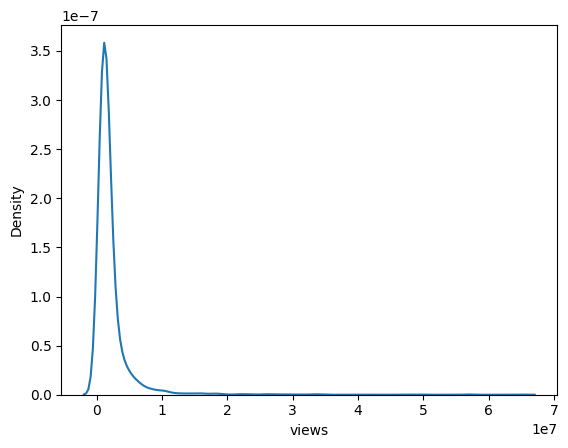

In [ ]:
# Distribution  of values for views column.
sns.kdeplot(Ted_talks["views"])

We can observe that the values distribution for views is rightly

Making a box plot of views column to check for outliers.

Note that the original views values vary a lot and the box plot was'nt helpful to get any meaningful information. Therefore we are plotting it for 4th root of views since it would help us give the better picture of range and distribution of data.

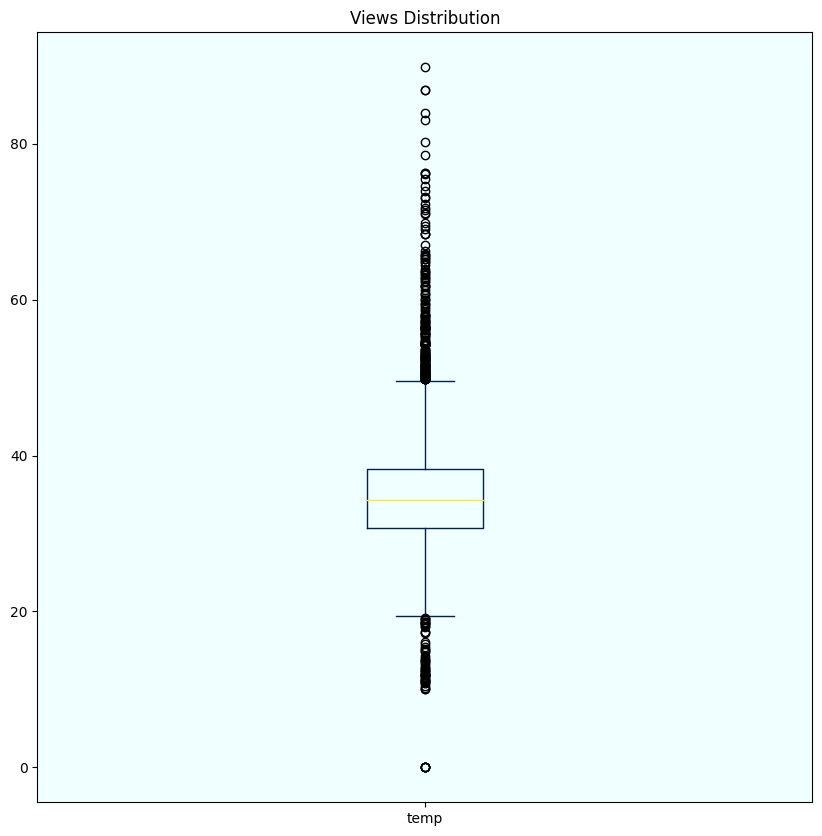

In [ ]:
# Making a temporary column with Fourth root of 'views' column such that we can visualize it using a box plot.
Ted_talks["temp"] = np.power(Ted_talks["views"], 1/4)

# Plotting the Box plot on "temp" column.
Ted_talks.plot(y = "temp", kind = "box", title = "Views Distribution",
               figsize = (10,10), colormap = "cividis").patch.set_facecolor('#f0ffff')

# Dropping the 'temp' column since its irrelevant
Ted_talks.drop(axis = 1, labels = ["temp"], inplace = True)

Here we can see that some videos are there with zero views, so those are definitely outliers for us. Hence we will drop those rows where views are zero.

Also as an assumption we are considering 1000 as a minimum number of views for a video so if views are any lower than that, that row will be dropped.

In [ ]:
# Videos with 0 views.
Ted_talks[Ted_talks["views"] == 0]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
2813,17850,Por qué necesitamos proteger el alta mar,Enric Sala,{0: 'Enric Sala'},{0: ['marine ecologist']},{0: 'Dr. Enric Sala is a former university pro...,0,2018-04-26,2018-06-06,TED en Español en NYC,es,"['en', 'es']",NaN,772,"['environment', 'economics', 'biosphere', 'nat...","{17733: ""Let's turn the high seas into the wor...",https://www.ted.com/talks/enric_sala_por_que_n...,Estamos pescando más rápido que la capacidad d...,If you randomly jumped in any point of the sea...
3056,29009,Cómo usar el arte de la fotografía para restau...,Alejandro Chaskielberg,{0: 'Alejandro Chaskielberg'},{0: ['photographer']},"{0: 'Alejandro Chaskielberg is a photographer,...",0,2018-11-05,2018-11-29,TEDxRiodelaPlata,es,"['en', 'es', 'pt']",NaN,862,"['art', 'photography', 'community', 'history',...",{2854: 'How your pictures can help reclaim los...,https://www.ted.com/talks/alejandro_chaskielbe...,¿Qué le puede suceder a la memoria cuando la e...,"Recently, my daughter and I decided to give aw..."
3068,29688,Por qué deberíamos comer más bichos,Renata di Tullio,{0: 'Renata di Tullio'},{0: ['técnica agropecuaria y agroalimentaria']},{0: 'Rena es Técnica Agropecuaria y Agroalimen...,0,2018-11-05,2018-12-07,TEDxRiodelaPlata,es,"['en', 'es', 'nl']",NaN,417,"['global issues', 'science', 'insects', 'food'...","{2427: 'The case for fish farming', 1018: 'Why...",https://www.ted.com/talks/renata_di_tullio_por...,"Have you ever considered crickets, houseflies ...",I'm passionate about insects for two reasons. ...
3520,43755,Can dogs sniff out malaria?,James Logan,{0: 'James Logan'},"{0: ['biologist', 'medical entomologist']}",{0: 'Professor James Logan leads an internatio...,0,2019-05-18,2019-06-11,TEDxLondon,en,"['en', 'pt-br', 'ru', 'zh-tw']",NaN,1099,"['health', 'public health', 'animals', 'smell'...",{1819: '3 reasons we still haven’t gotten rid ...,https://www.ted.com/talks/james_logan_can_dogs...,"Each year, hundreds of thousands of people aro...",Malaria is still one of the biggest killers on...
3790,55342,¿Como será el cine del futuro?,Diego Prilusky,{0: 'Diego Prilusky'},{0: ['productor audiovisual']},"{0: 'Diego viene del mundo de la producción, l...",0,2019-10-24,2019-12-19,TEDxRiodelaPlata,es,"['en', 'es', 'it']",NaN,743,"['technology', 'film', 'movies', 'entertainmen...","{1476: 'The shared wonder of film', 403: ""A to...",https://www.ted.com/talks/diego_prilusky_como_...,"Desde las películas western, hasta las cintas ...",The art of movies has existed for more than 10...
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


In [ ]:
# dropping rows with views less than or equal to 1000.
Ted_talks.drop(Ted_talks[Ted_talks['views'] <= 1000].index, inplace = True)

###**Duration**

Now we'll analyse the duration column. We'll see how is the value distribution and look for any relativity with views.

<Axes: xlabel='duration', ylabel='Density'>

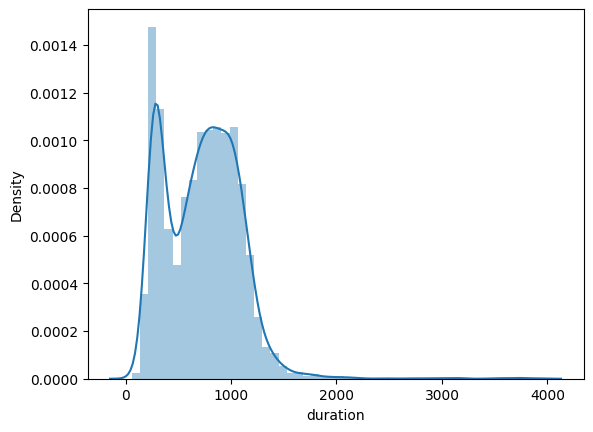

In [ ]:
# Distribution of duration.
sns.distplot(Ted_talks["duration"])

The distribution for duration is rightly skewed.

In [ ]:
# HTML script to import the tableau sheet for visualization.

%%HTML
<div class='tableauPlaceholder' id='viz1656150365689' style='position: relative'>
<noscript><a href='#'><img alt='Views Vs Duration ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA4&#47;Sheet6&#47;1_rss.png' style='border: none' /></a></noscript>
<object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
<param name='embed_code_version' value='3' />
<param name='site_root' value='' />
<param name='name' value='Ted_talks_EDA4&#47;Sheet6' />
<param name='tabs' value='no' />
<param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA4&#47;Sheet6&#47;1.png' />
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
<param name='language' value='en-US' /></object></div>
<script type='text/javascript'>
var divElement = document.getElementById('viz1656150365689');
var vizElement = divElement.getElementsByTagName('object')[0];
vizElement.style.width='90%';vizElement.style.height='500px';
var scriptElement = document.createElement('script');
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';
vizElement.parentNode.insertBefore(scriptElement, vizElement);
</script>

Here we can see that both views and duration are populated on the left side, it is clear from the above graph that both the columns are right skewed since the lump of data is in the start followed by a long tail. Hence, it is safe to say that duration might have some linear or non-linear relationship with views.

###**Comments**
Now lets check the distributions for comments and relatability along with views.

<Axes: xlabel='comments', ylabel='Density'>

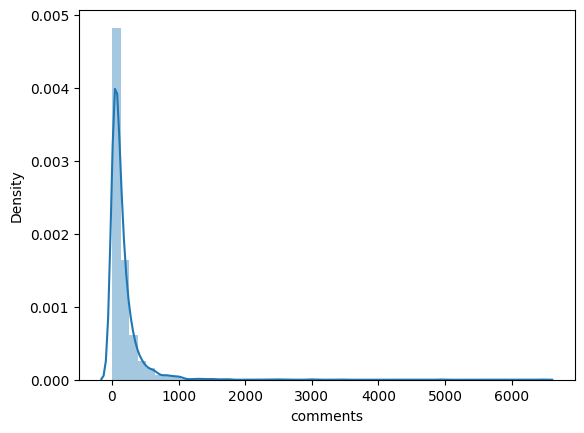

In [ ]:
# Distribution of comments.
sns.distplot(Ted_talks["comments"])

The distribution for comments is also rightly skewed.

In [ ]:
# HTML script to import the tableau sheet for visualization.
%%HTML
<div class='tableauPlaceholder' id='viz1656150669376' style='position: relative'>
<noscript><a href='#'><img alt='Views Vs Comments ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA2&#47;Sheet8&#47;1_rss.png' style='border: none' /></a></noscript>
<object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
<param name='embed_code_version' value='3' />
<param name='site_root' value='' />
<param name='name' value='Ted_talks_EDA2&#47;Sheet8' />
<param name='tabs' value='no' />
<param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA2&#47;Sheet8&#47;1.png' />
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
<param name='language' value='en-US' />
</object></div>
<script type='text/javascript'>
var divElement = document.getElementById('viz1656150669376');
var vizElement = divElement.getElementsByTagName('object')[0];
vizElement.style.width='90%';vizElement.style.height='500px';
var scriptElement = document.createElement('script');
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';
vizElement.parentNode.insertBefore(scriptElement, vizElement);
</script>

From  the above graph it is clear that comments and views both are rightly skewed and they both have somewhat of a similar distributions. This might signify some linear correlation.

Also as previously seen comments have a lot of NaN values and also distribution is highly skewed to the right side indicating some outliers. So lets deal with those issues too.

In [ ]:
# videos with 0 comments.
Ted_talks[Ted_talks["comments"] == 0]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
3893,57920,The power of the Afro pick,Jon Gray,{0: 'Jon Gray'},"{0: ['food enthusiast', 'dishwasher']}",{0: 'Culinary evangelist Jon Gray is the voice...,208222,2020-02-04,2020-02-17,Small Thing Big Idea,en,"['ar', 'en', 'es', 'fr', 'tr']",0.0,213,"['design', 'history', 'culture', 'creativity',...",{44259: 'The next big thing is coming from the...,https://www.ted.com/talks/jon_gray_the_power_o...,The Afro pick is much more than a styling tool...,"You don't really look at a toothbrush and say,..."
3898,58706,How surfboards connect us to nature,Yves Béhar,{0: 'Yves Béhar'},{0: ['designer']},"{0: 'Yves Béhar is a designer, entrepreneur an...",181783,2020-02-11,2020-02-18,Small Thing Big Idea,en,"['ar', 'en', 'es', 'fr', 'pt-br', 'tr']",0.0,203,"['oceans', 'design', 'creativity', 'water', 's...","{57920: 'The power of the Afro pick', 57917: '...",https://www.ted.com/talks/yves_behar_how_surfb...,Here's how the surfboard changed our relations...,Riding a wave is like suddenly gaining speed a...


In [ ]:
# dropping rows with 0 comments.
Ted_talks.drop(Ted_talks[Ted_talks['comments'] <= 0].index, inplace = True)

Now lets also treat te NaN values, we'd first remove the outliers, that is vidoes having more than 1000 comments. Then we'd see the distribution graph again to analyse what would be the right approach to treat NaN.

In [ ]:
# list of indexes where number of comments are more than 1000
li = Ted_talks[Ted_talks["comments"]>1000].index

# dropping rows where comments are more than 1000
Ted_talks.drop(labels = li, axis = 0, inplace = True)

<Axes: xlabel='comments', ylabel='Density'>

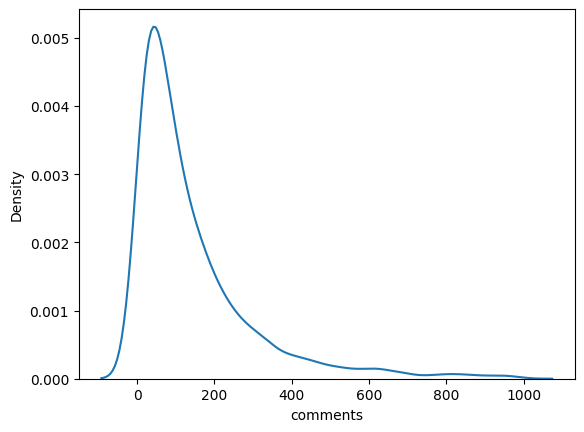

In [ ]:
# Distribution of comments after removing outliers.
sns.kdeplot(Ted_talks["comments"])

We can see the distribution looks much better now and we can easily fill the NaN values with the median of comments.

In [ ]:
# Filling NaN values in comments field with median.
Ted_talks["comments"].fillna(Ted_talks["comments"].median(), axis = 0, inplace = True)

###**Events**

There are lot of events pertaining to TED and we are going to analyse if these events are affecting the popularity of a talk.

In [ ]:
# HTML script to import the tableau sheet for visualization.
%%HTML
<div class='tableauPlaceholder' id='viz1656150880986' style='position: relative'>
<noscript><a href='#'><img alt='Average Views for different Events.  ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA&#47;Sheet9&#47;1_rss.png' style='border: none' /></a></noscript>
<object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
<param name='embed_code_version' value='3' />
<param name='site_root' value='' />
<param name='name' value='Ted_talks_EDA&#47;Sheet9' />
<param name='tabs' value='no' /><param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA&#47;Sheet9&#47;1.png' />
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
<param name='language' value='en-US' />
</object></div>
<script type='text/javascript'>
var divElement = document.getElementById('viz1656150880986');
var vizElement = divElement.getElementsByTagName('object')[0];
vizElement.style.width='90%';vizElement.style.height='400px';
var scriptElement = document.createElement('script');
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';
vizElement.parentNode.insertBefore(scriptElement, vizElement);
</script>

Here we can see that **TED2006** is the event with most numbers of average views per video and that is obvious because the videos uploaded in 2006 have been on the internet for the longest while and they would have reached the most amount of viewers. Also the event **TED Glabal 2013** is having second highest average of views signifying the popularity of the event.  

###**All speakers**

All speakers contain the key value pair (distionary) of all the speakers for that particular TED talk. This information can be used to derive if there are one of multiple speakers in a TED talks and if it is affecting the views or popularity of the video.

We saw previously that this column has some Null values so we'll replace them with a uni-variable dictionary that contains just one element, here we are assuming if all speakers is null than at least there would have been one speaker who delivered the talk, i.e, Speaker_1.

In [ ]:
# filling nan with a dictionary for all_speakers column.
Ted_talks["all_speakers"].fillna(value = str({0:""}), axis = 0, inplace=True)

##**Feature Engineering**
***
All machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristics to work properly. Here, the need for feature engineering arises. Feature engineering mainly have two goals:

* Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
* Improving the performance of machine learning models.

We'll try adding and removing some features in this section in order to make a perfect data matrix we can pass to a machine learning model. We will try to interpret categorical features as numeric to be passed to the ML models.

In [ ]:
# lets have a look at the columns again.
Ted_talks.head(1)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."


Lets extract some information from the **published_date** column. We can easily extract the year of uploading of TED talk from that column.

In [ ]:
# splitting the day, month and year from the published_date.
Ted_talks['published_date'] = Ted_talks['published_date'].apply(lambda x: dt.datetime.strptime(x,"%Y-%m-%d"))

# Making seperate column for day, month and year of upload.
Ted_talks['year'] = Ted_talks['published_date'].dt.year
Ted_talks['month'] = Ted_talks['published_date'].dt.month
Ted_talks['day'] = Ted_talks["published_date"].dt.day_name()

# storing weekdays in order of numbers from 0 to 6.
daydict = {'Sunday' : 0, 'Monday' : 1, 'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}

# making new column holding information of day number.
Ted_talks['daynum'] = Ted_talks['day'].map(daydict)

# making a column weekdays_weekend that would hold 1
# if the video is uploaded on a weekend, otherwise 0.
Ted_talks['weekdays_weekend'] = Ted_talks['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

From the year column we can extract more information and check the recency and per annum views for a video. The recency is the number of years a video has been available on the website for.

We can calculate recency by subtracting the upload year from 2021(we only have TED talks data upto year 2020, so we are considering videos uploaded in 2020 been available on website for at least a year.

Also Per annum views of a video can be found by dividing the views in total by the recency of the video(number of years its been online).

In [ ]:
# Calculating year recency of a video.
Ted_talks["year_recency"] = 2021 - Ted_talks["year"]

# Calculating per annum views.
Ted_talks["per_annum_views"] = Ted_talks["views"]//Ted_talks["year_recency"]

**available_lang** holds all languages the video is available in, we can count the total languages for a video and hold that count as a feature. We are going with the intution that if a video is available in many languages, it'd reach a much wider audience.

In [ ]:
# Calculating available languages.
Ted_talks["available_lang_count"] = Ted_talks["available_lang"].apply(lambda x: len(eval(x)))

Similarly, we can calculate the number of topics covered by a video.

In [ ]:
# Calculating topics covered by a talk.
Ted_talks["topics_covered"] = Ted_talks["topics"].apply(lambda x: len(eval(x)))

We can also give weight to the video based on the topics covered. This can be achieved by calculating the number of videos available with that topic. The popular topics would have a high frequency and we can use that frequency to put as weight of the topic.

In [ ]:
# creating a empty dictionary.
d = {}

# iterating over the rows to get the list of topics for a talk.
for row in Ted_talks.index:
    list_of_topics = Ted_talks["topics"][row]
    list_of_topics = list_of_topics.strip('][').split(', ')

    # Iterating over topics list and adding every occurance of a topic to 'd'.
    for topic in list_of_topics:
        topic = topic[1:len(topic)-1]
        d[topic] = d.get(topic, 0) + 1
# 'd' holds the topic names as keys and their frequencies as values accross all the topics available

In [ ]:
# Function to calculate weight of topics for a talk.
def weight_of_topic(x):
    x = eval(x)
    for i in range(len(x)):
        x[i] = d[str(x[i])]
    weight = sum(x)
    return weight

# Calculating topic weights of all talks and adding it to a new column.
Ted_talks["topics_weight"] = Ted_talks["topics"].apply(lambda x: weight_of_topic(x))


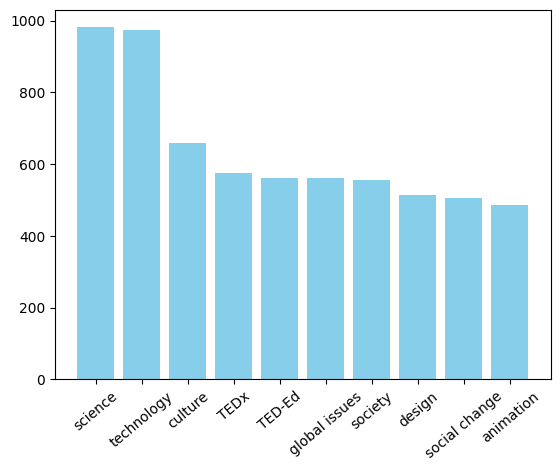

In [ ]:
# Storing a sorted list of top 10 most popular topics/tags in a new dictionary
ddd = dict(sorted(d.items(), key = itemgetter(1), reverse = True)[:10])

# storing set of dictionary items in a list.
myList = ddd.items()

# plotting top 10 topics based on frequency.
x, y = zip(*myList)
plt.bar(x, y, color = "#87CEEB")
plt.xticks(rotation = 40)
plt.show()

For description of a video we are doing a word count, here we are assuming that a video with more of elaborated description would cover more tags and topics that can attract more viewers.

In [ ]:
# Calculating word counts of description.
Ted_talks['words_count_descp'] = Ted_talks['description'].str.split().apply(len)

Now, there's also a column for related_talks which holds the dictionary of related videos for any video. Using this information we can derive a feature that will hold the average views out of all the related videos for a particular talk.

In [ ]:
# Initialize related_views with 0.
Ted_talks["related_views"] = 0

# Calculating related videos views average for each talk
for row in Ted_talks.index:
  # storing the dictionary of related talks.
  rel_talks = eval(Ted_talks["related_talks"][row])

  sum_views = 0

  # Iterating over the dictionary to get views for all related talks
  for talk_id in rel_talks:
    view_vid = Ted_talks[Ted_talks["talk_id"] == talk_id]
    view_vid.reset_index(inplace=True)

    # Trying to add the video views, if an exception occurs then we'll add 0.
    # This is to counter the row having NaN values in related _talks.
    try:
      view_count = view_vid["views"][0]
      sum_views = sum_views + view_count

    # Executed when a exception is thrown
    except:
      sum_views = sum_views + 0
  # calculating average of all video views
  avg_views = sum_views//len(rel_talks)
  Ted_talks["related_views"][row] = avg_views

Lets drop talk_id column now. Since its not helpful for any further computation.

In [ ]:
# dropping Talk_id
Ted_talks.drop(axis = 1, labels = ["talk_id"], inplace = True)

Now, lets see the correlation of all the other features with our dependant variable, i.e, **Views**

<Axes: >

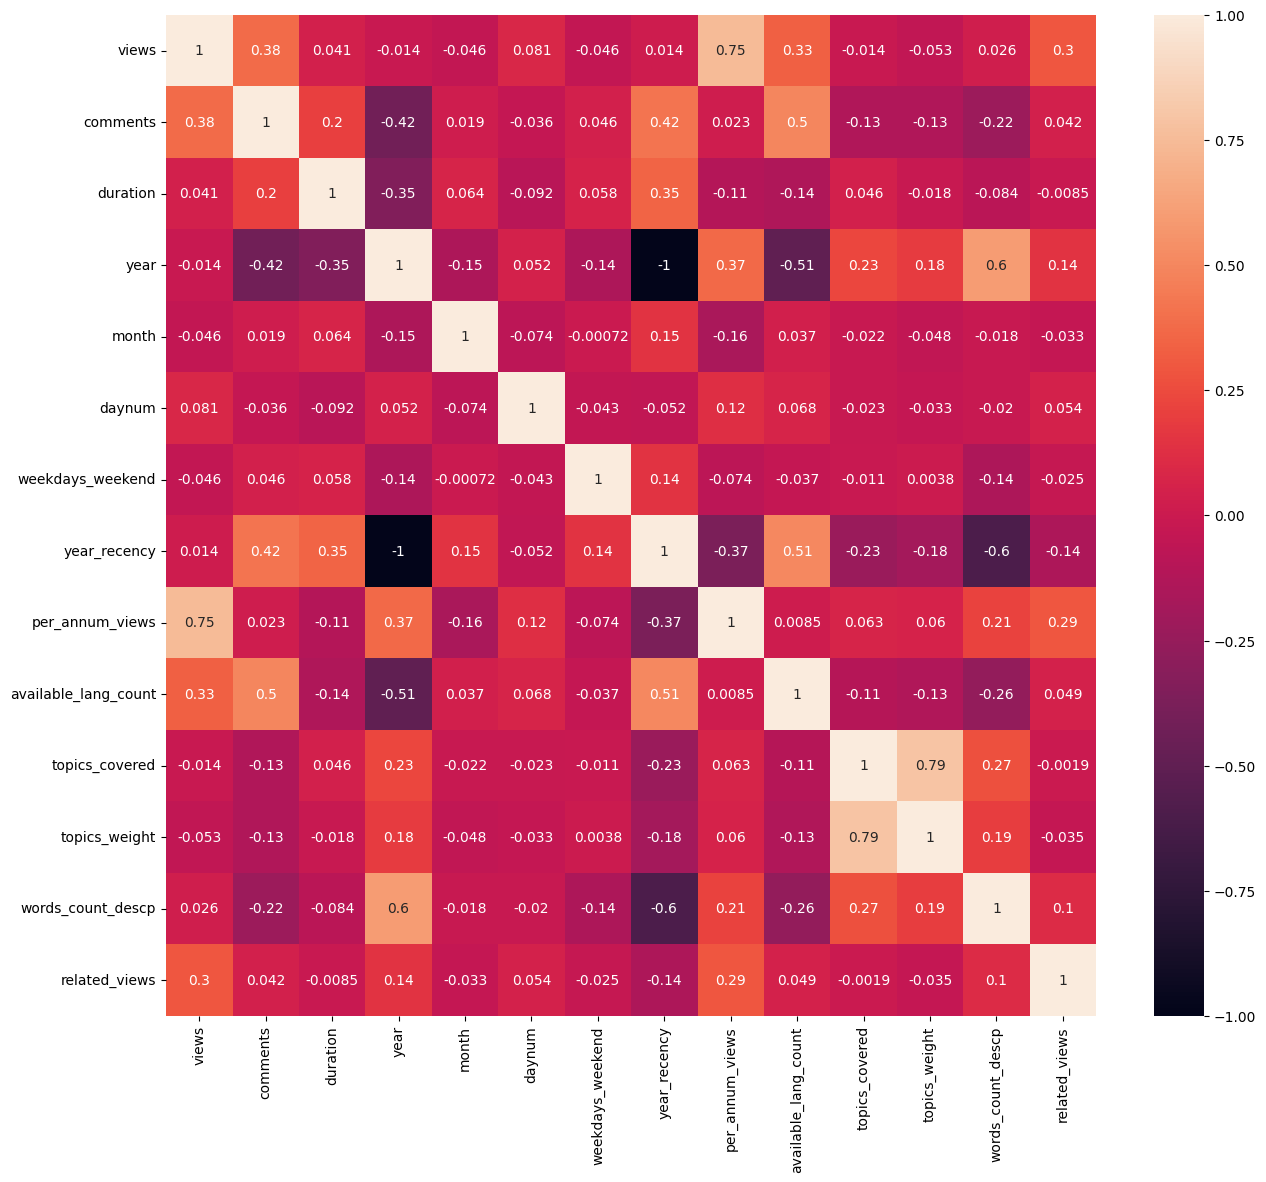

In [ ]:
# Plotting a correlation map with that'll show linear correlations across all the features.
correlmap = Ted_talks.corr()
f, ax = plt.subplots(figsize=(15, 13))
sns.heatmap(correlmap, annot=True, ax = ax)

From the above chart it is clear that not all the features have some linear relations with the target variable, also these features are having indirect correlations with other features. By having a look at the above graph, we are able to locate some features that aren't contributing much with the amount of correlations that they have. Also some features like Year and Year_recency aren't making much sense to include because both are actually representing same thing. We can drop one of them.

We can also select more such features that are making sense to include, rest of the features we can drop to improve and optimise our model.

In [ ]:
# dropping unneccessary columns.
Ted_talks.drop(axis = 1, labels = ["all_speakers", "title", "occupations",
                                    "recorded_date", "about_speakers",
                                   "related_talks", "url",
                                   "transcript", "speaker_1", "event",  "available_lang",
                                  "topics", "description", "day", "month", "year", "native_lang",
                                   'published_date', "daynum", "weekdays_weekend"], inplace = True)

Now, lets have a look at the new correlation map.

<Axes: >

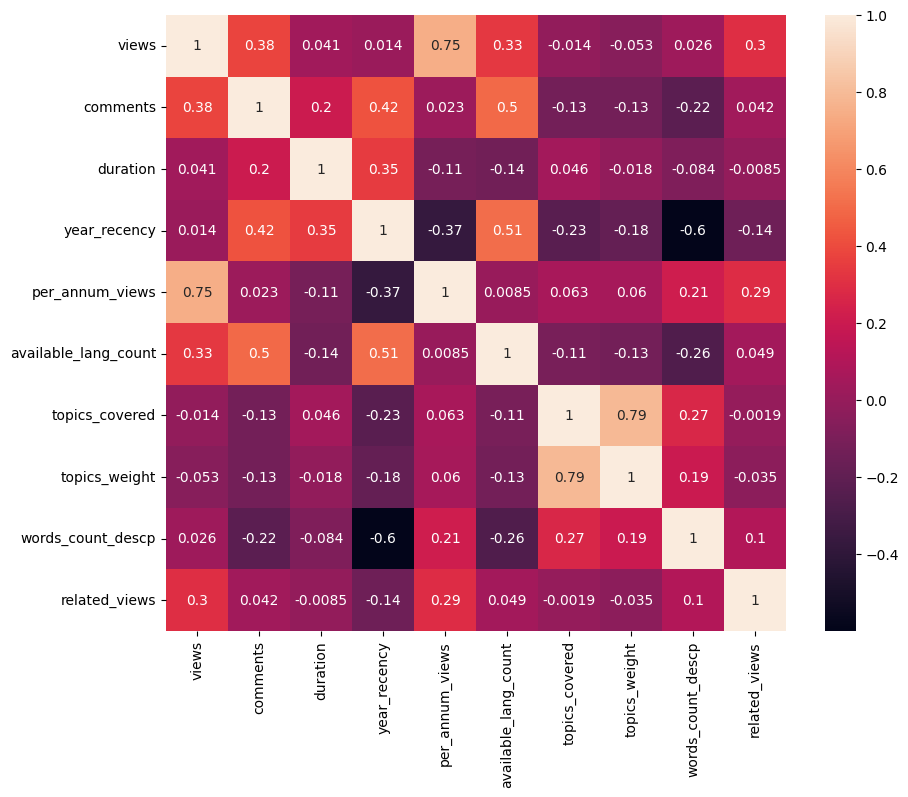

In [ ]:
# Plotting correlation  matrix for all features with respect to target variable.
correlmap = Ted_talks.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlmap, annot=True, ax = ax)

We can also check scatter plots between all features and views. This will give further better understanding of independent features and their collinearity with target feature.

In [ ]:
# storing dependent variable
dependent_variable = 'views'

In [ ]:
# storing independent variables
independent_variables = list(set(Ted_talks.columns.tolist()) - {"views"})

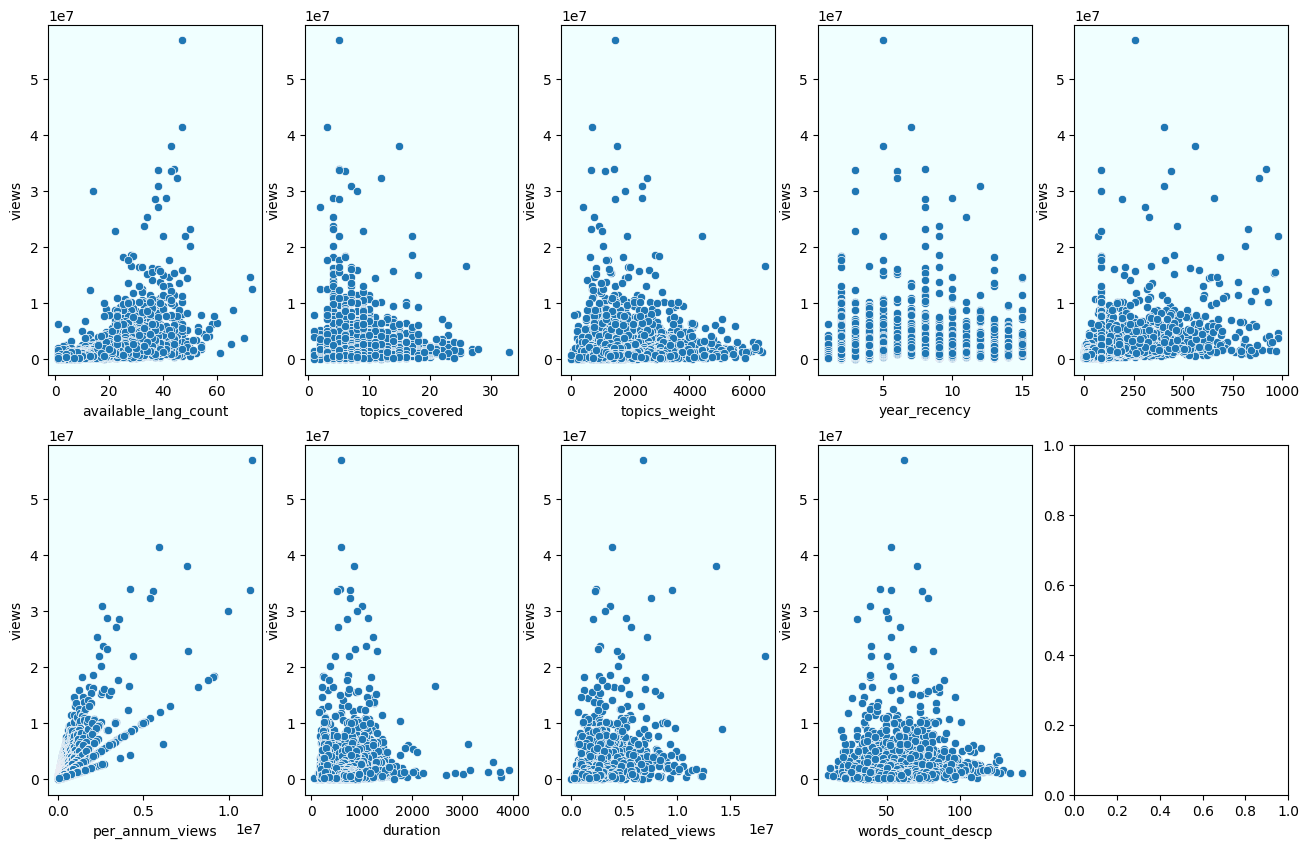

In [ ]:
# Plotting the subplot graph for all the features with respect to views
variable_df = Ted_talks[independent_variables]
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize= (16,10))

for i, col in enumerate(variable_df.columns):
  sns.scatterplot(data=Ted_talks, x=col, y="views", ax = axes[i//5, i%5]).patch.set_facecolor('#f0ffff')

##**Splitting the Dataframe into train and test sets.**
***

Now that the Dataset is cleaned and we have added all the neccessary features along with some conversions of categorical features. Its time to split the data into training and testing sets.

Note:- These training and testing data are going to be same for all the model we'll build such that all of the models are evaluated on a same set of parameters.

In [ ]:
# lets have a look at the data before going futther with splitting.
Ted_talks

,views,comments,duration,year_recency,per_annum_views,available_lang_count,topics_covered,topics_weight,words_count_descp,related_views
0,3523392,272.0,977,15,234892,43,9,3795,39,1659584
1,14501685,628.0,1190,15,966779,49,11,1840,26,1573950
2,1920832,124.0,1286,15,128055,26,9,1993,31,3051136
3,2664069,219.0,1116,15,177604,35,9,1611,31,1053294
5,1208138,48.0,1198,15,80542,19,5,1555,32,1798983
...,...,...,...,...,...,...,...,...,...,...
3999,760969,37.0,941,1,760969,4,8,1930,81,1052880
4000,502934,6.0,690,1,502934,1,7,2173,97,3834844
4001,307187,88.0,346,1,307187,4,8,2355,77,2355543
4002,464414,9.0,774,1,464414,1,5,1325,75,1433374


In [ ]:
# independent variables
X = Ted_talks[list(Ted_talks.columns)[1:]]

# dependent variable
y = Ted_talks["views"]


In [ ]:
# display independent variables dataframe
X

,comments,duration,year_recency,per_annum_views,available_lang_count,topics_covered,topics_weight,words_count_descp,related_views
0,272.0,977,15,234892,43,9,3795,39,1659584
1,628.0,1190,15,966779,49,11,1840,26,1573950
2,124.0,1286,15,128055,26,9,1993,31,3051136
3,219.0,1116,15,177604,35,9,1611,31,1053294
5,48.0,1198,15,80542,19,5,1555,32,1798983
...,...,...,...,...,...,...,...,...,...
3999,37.0,941,1,760969,4,8,1930,81,1052880
4000,6.0,690,1,502934,1,7,2173,97,3834844
4001,88.0,346,1,307187,4,8,2355,77,2355543
4002,9.0,774,1,464414,1,5,1325,75,1433374


In [ ]:
# display dependent variable dataframe
y

0        3523392
1       14501685
2        1920832
3        2664069
5        1208138
          ...   
3999      760969
4000      502934
4001      307187
4002      464414
4003       56582
Name: views, Length: 3955, dtype: int64

In [ ]:
# calling train_test_split() to get the training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

# split sizes
print(X_train.shape)
print(X_test.shape)

(2966, 9)
(989, 9)


##**Models**
***
Now its time to implement the Machine Learning models and check the accuracy of each model to point out the best one out of all. In this project we are implementing 7 machine learning algorithms to predict the target variable and then we'll apply optimization techniques on the one that gives best resulting accuracy out of all.

Following algorithms have been used for predictions:-

* Linear Regression
* Lasso Regression
* Ridge Regression
* Elastic Net Regression
* Decision Tree
* Random Forest Regression
* XGB Regression



### **Linear Regression**

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, rather than trying to classify them into categories. There are two main types:

**Simple regression**:

Simple linear regression uses traditional slope-intercept form, where m and b are the variables our algorithm will try to “learn” to produce the most accurate predictions. x represents our input data and y represents our prediction.

**y=mx+b**

**Multivariable regression**:

A more complex, multi-variable linear equation might look like this, where w represents the coefficients, or weights, our model will try to learn.

**f(x,y,z)=w1x+w2y+w3z**

In [ ]:
# building the model and fitting training data
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
# checking the score
reg.score(X_train, y_train)

0.7581058272277423

In [ ]:
# check the coefficeints
reg.coef_

array([ 4.06049769e+03,  5.39336331e+02,  9.54385011e+04,  2.93734619e+00,
        5.03477467e+04,  5.33156298e+04, -2.52943423e+02,  4.43958959e+03,
        1.17557456e-01])

In [ ]:
# predict for train data
y_pred_train=reg.predict(X_train)

# predict for test data
y_pred_test=reg.predict(X_test)

In [ ]:
# calculating MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

# calculating RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


# calculating MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)


# calculating r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_lr )

MSE : 1835030731368.015
RMSE : 1354633.0615218333
MAE : 724721.2427278758
R2 : 0.7581058272277423
Adjusted R2 : 0.7558820810020526


In [ ]:
# storing the test set metrics value in the train evaluation dataframe.
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
# calculating MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

# calculating RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


# calculating MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


# calculating r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 3148439433367.3506
RMSE : 1774384.2406218983
MAE : 826572.7332936238
R2 : 0.692884551337869
Adjusted R2 : 0.6900612223920475


In [ ]:
# storing the test set metrics value in test evaluation dataframe.
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

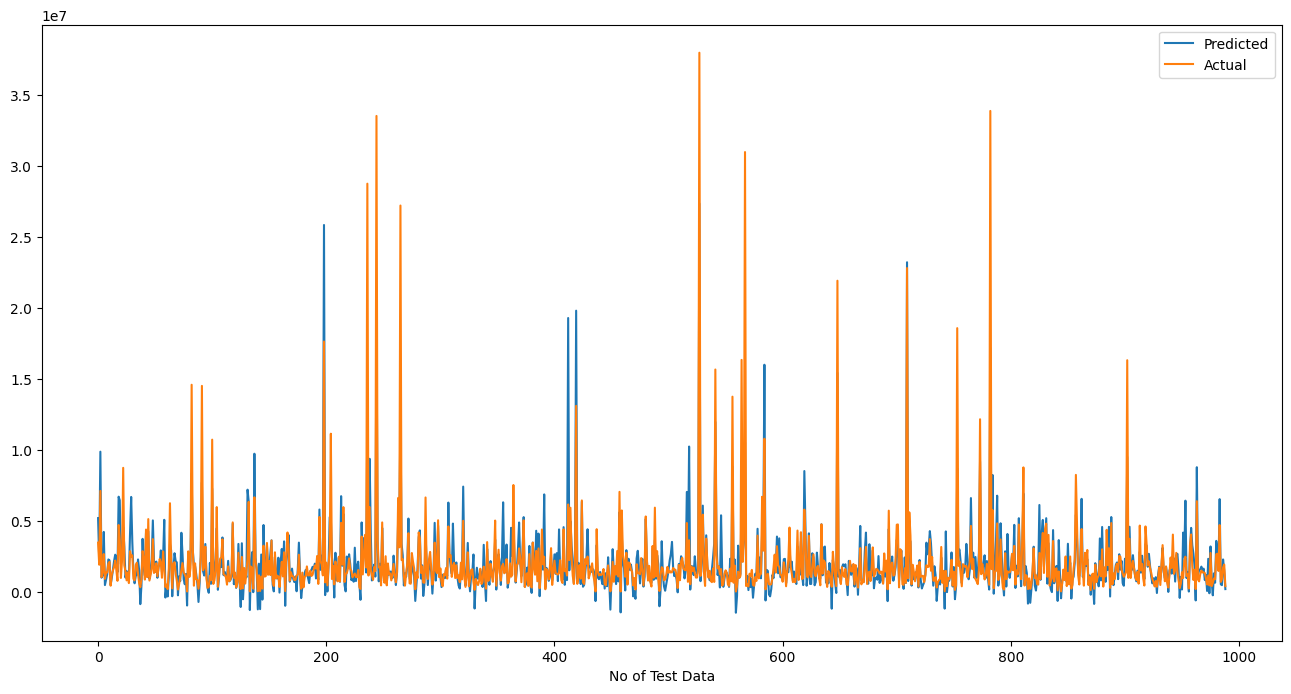

In [ ]:
# Plot the figure
plt.figure(figsize=(16,8))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

### **Lasso Regression**

Lasso regression stands for Least Absolute Shrinkage and Selection Operator. It adds penalty term to the cost function. This term is the absolute sum of the coefficients. As the value of coefficients increases from 0 this term penalizes, cause model, to decrease the value of coefficients in order to reduce loss. The difference between ridge and lasso regression is that it tends to make coefficients to absolute zero as compared to Ridge which never sets the value of coefficient to absolute zero.

**Limitation of Lasso Regression**:
Lasso sometimes struggles with some types of data. If the number of predictors (p) is greater than the number of observations (n), Lasso will pick at most n predictors as non-zero, even if all predictors are relevant (or may be used in the test set).
If there are two or more highly collinear variables then LASSO regression select one of them randomly which is not good for the interpretation of data

In [ ]:
# Creating an instance of Lasso Regression implementation
lasso = Lasso(alpha=1.0, max_iter=3000)

# Fitting the Lasso model
lasso.fit(X_train, y_train)

# Model Score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.6928845451631551 0.7581058272276879


In [ ]:
# Predict for training data
y_pred_train_lasso=lasso.predict(X_train)

# Predict for testing data
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
# calculating MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

# calculating RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


# calculating MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


# calculating r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_l )


MSE : 1835030731368.4282
RMSE : 1354633.0615219858
MAE : 724721.1462752696
R2 : 0.7581058272276879
Adjusted R2 : 0.7558820810019976


In [ ]:
# storing the train set metrics value in the train evaluation dataframe
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df = training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

# calculating RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


# calculating MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


# calculating r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_l )

MSE : 3148439496668.342
RMSE : 1774384.2584593513
MAE : 826572.6365421831
R2 : 0.6928845451631551
Adjusted R2 : 0.6900612161605693


In [ ]:
# storing the test set metrics value in the test evaluation dataframe
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

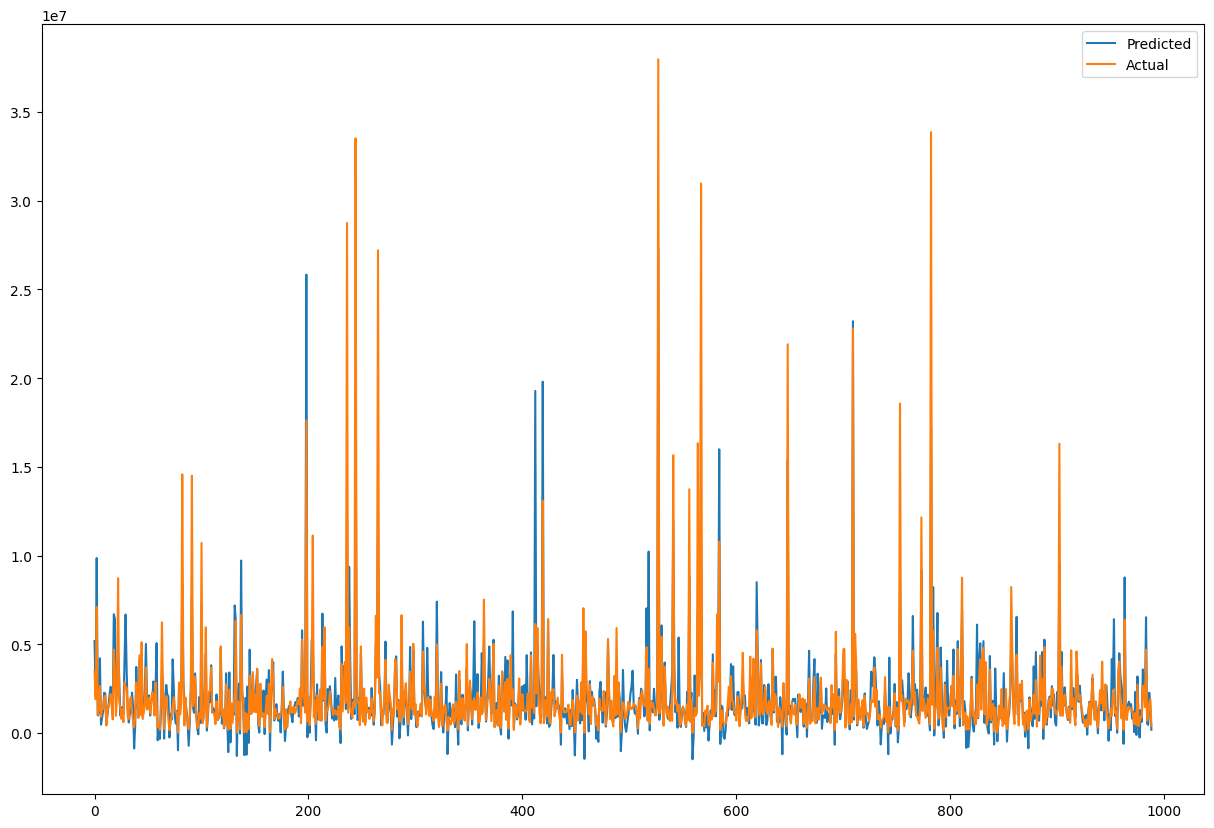

In [ ]:
#Plot the actual vs predicted graph.
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

### **Ridge Regression**

In Ridge regression, we add a penalty term which is equal to the square of the coefficient. The L2 term is equal to the square of the magnitude of the coefficients. We also add a coefficient  lambda  to control that penalty term. In this case if  lambda  is zero then the equation is the basic OLS else if  lambda  >  0 then it will add a constraint to the coefficient. As we increase the value of lambda this constraint causes the value of the coefficient to tend towards zero. This leads to tradeoff of higher bias (dependencies on certain coefficients tend to be 0 and on certain coefficients tend to be very large, making the model less flexible) for lower variance.

**Limitation of Ridge Regression**: Ridge regression decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient been zero rather only minimizes it. Hence, this model is not good for feature reduction.

In [ ]:
# Creating the model object
ridge= Ridge(alpha=0.1)

In [ ]:
# FITTING THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
# checking the score
ridge.score(X_train, y_train)

0.7581058272273803

In [ ]:
# predict for train data
y_pred_train_ridge=ridge.predict(X_train)

# predict for test data
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
# calculating MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

# calculating RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


# calculating MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


# calculating r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_r)

MSE : 1835030731370.7612
RMSE : 1354633.061522847
MAE : 724720.9821015522
R2 : 0.7581058272273803
Adjusted R2 : 0.7558820810016872


In [ ]:
# storing the train set metrics value in the train evaluation dataframe
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

# calculating RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


# calculating MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


# calculating r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_r)

MSE : 3148439647092.2437
RMSE : 1774384.300846985
MAE : 826572.474302585
R2 : 0.6928845304900115
Adjusted R2 : 0.6900612013525347


In [ ]:
# storing the test set metrics value in the test evaluation dataframe
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

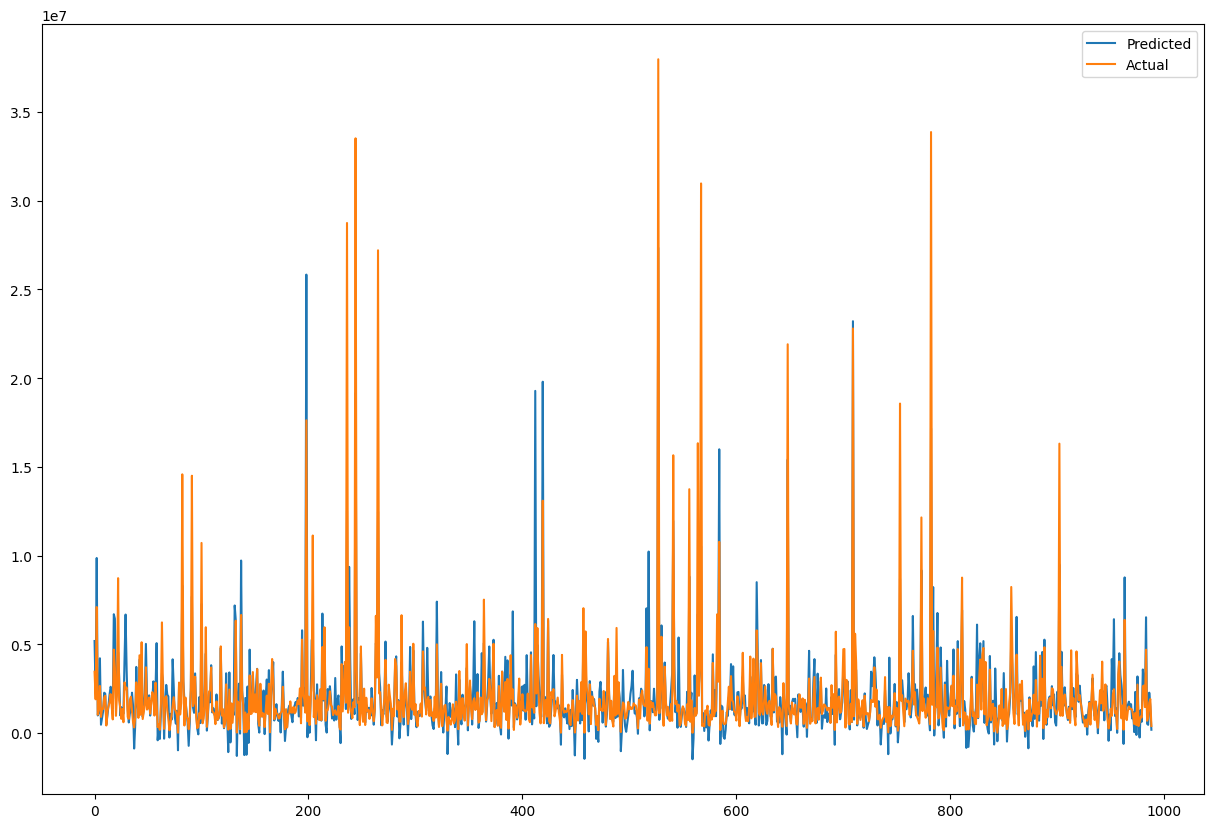

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

### **Elastic Net Regression**

Sometimes, the lasso regression can cause a small bias in the model where the prediction is too dependent upon a particular variable. In these cases, elastic Net is proved to better it combines the regularization of both lasso and Ridge. The advantage of that it does not easily eliminate the high collinearity coefficient.

In [ ]:
# creating a model object.
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
# FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
# check the score
elasticnet.score(X_train, y_train)

0.7581050492800048

In [ ]:
# predict on train data
y_pred_train_en=elasticnet.predict(X_train)

# predict on test data
y_pred_test_en=elasticnet.predict(X_test)

In [ ]:
# calculating MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

# calculating RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


# calculating MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


# calculating r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e = (1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_e)

MSE : 1835036632948.816
RMSE : 1354635.239815064
MAE : 724347.2505772208
R2 : 0.7581050492800048
Adjusted R2 : 0.7558812959025993


In [ ]:
# storing the train set metrics value into the train evaluation dataframe
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

# calculating RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


# calculating MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


# calculating r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)

Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_e)

MSE : 3148759488760.176
RMSE : 1774474.4260654126
MAE : 826197.465107531
R2 : 0.6928533314406327
Adjusted R2 : 0.6900297154886058


In [ ]:
# storing the test set metrics value into the test evaluation dataframe
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

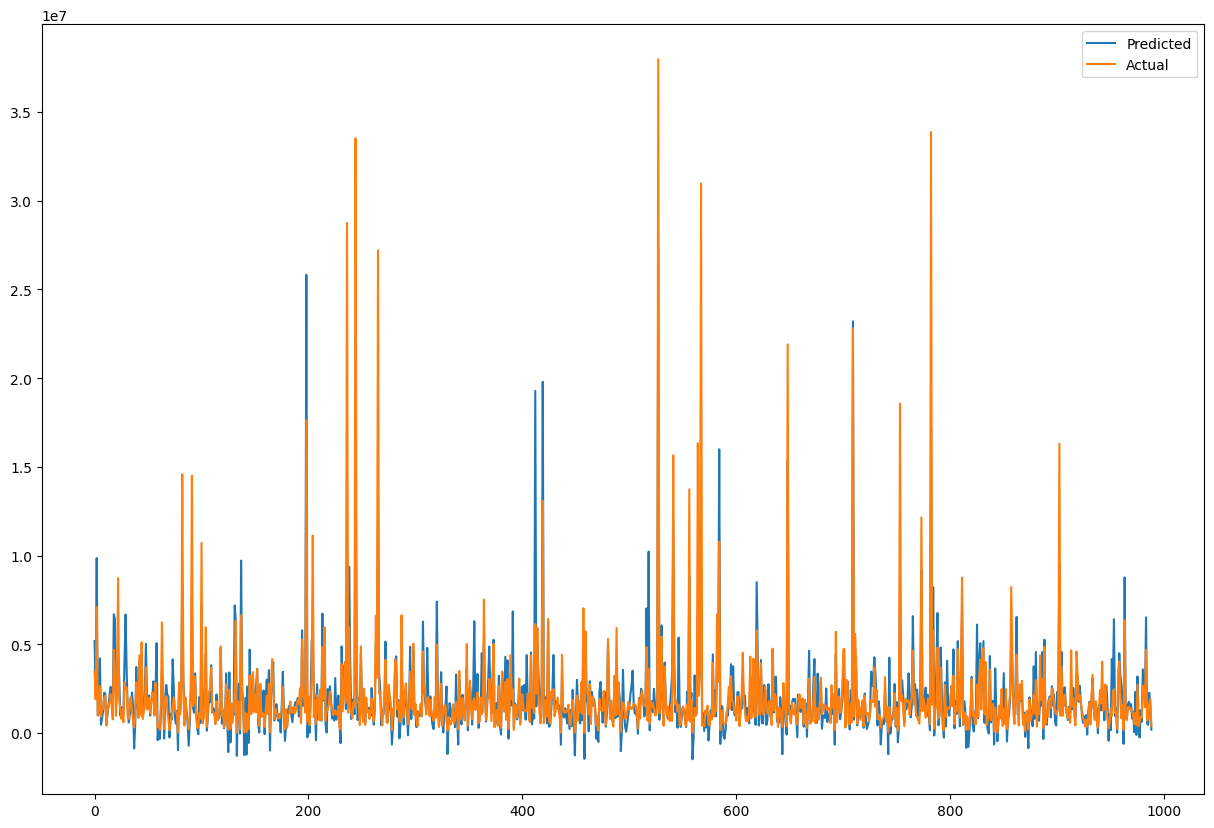

In [ ]:
# Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# display test evaluation dataframe
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,826572.733,3.148439e+12,1774384.241,0.693,0.69
1,Lasso regression,826572.637,3.148439e+12,1774384.258,0.693,0.69
2,Ridge regression,826572.474,3.148440e+12,1774384.301,0.693,0.69
3,Elastic net regression Test,826197.465,3.148759e+12,1774474.426,0.693,0.69


###**Decision Tree**

Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.

Decision trees are upside down which means the root is at the top and then this root is split into various several nodes. Decision trees are nothing but a bunch of if-else statements in layman terms. It checks if the condition is true and if it is then it goes to the next node attached to that decision.

In a Decision Tree diagram, we have:

**Root Node**: The first split which decides the entire population or sample data should further get divided into two or more homogeneous sets. In our case, the Outlook node.

**Splitting**: It is a process of dividing a node into two or more sub-nodes.

**Decision Node**: This node decides whether/when a sub-node splits into further sub-nodes or not. Here we have, Outlook node, Humidity node, and Windy node.

**Leaf**: Terminal Node that predicts the outcome (categorical or continuous value). The coloured nodes, i.e., Yes and No nodes, are the leaves.

In [ ]:
# building the model
decision_regressor = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100)
# fitting training data to the model
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
# predict for train data
y_pred_train_d = decision_regressor.predict(X_train)

# predict for test data
y_pred_test_d = decision_regressor.predict(X_test)

In [ ]:
# calculating model score
print("Model Score:",decision_regressor.score(X_train,y_train))

# calculating MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)

# calculating r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d)


Model Score: 0.9911343715578774
MSE : 67255446701.07555
RMSE : 259336.55103181183
MAE : 186697.9188145998
R2 : 0.9911343715578774
Adjusted R2 : 0.9910528693556516


In [ ]:
# storing the train set metrics value into the train evaluation dataframe
dict1={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:

# calculating MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


# calculating r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d)


MSE : 1087588314189.8447
RMSE : 1042875.0232841156
MAE : 300995.18936232
R2 : 0.89391087866192
Adjusted R2 : 0.8929355956261256


In [ ]:
# storing the test set metrics value into the test evaluation dataframe
dict2={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# display train evaluation dataframe.
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,724721.243,1.835031e+12,1354633.062,0.758,0.76
1,Lasso regression,724721.146,1.835031e+12,1354633.062,0.758,0.76
2,Ridge regression,724720.982,1.835031e+12,1354633.062,0.758,0.76
3,Elastic net regression,724347.251,1.835037e+12,1354635.240,0.758,0.76
4,Decision tree regression,186697.919,6.725545e+10,259336.551,0.991,0.99


In [ ]:
# display test evaluation dataframe.
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,826572.733,3.148439e+12,1774384.241,0.693,0.69
1,Lasso regression,826572.637,3.148439e+12,1774384.258,0.693,0.69
2,Ridge regression,826572.474,3.148440e+12,1774384.301,0.693,0.69
3,Elastic net regression Test,826197.465,3.148759e+12,1774474.426,0.693,0.69
4,Decision tree regression,300995.189,1.087588e+12,1042875.023,0.894,0.89


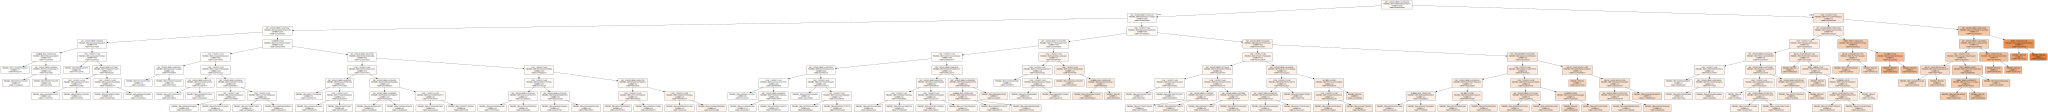

In [ ]:

# DOT data
dot_data = tree.export_graphviz(decision_regressor, out_file=None,
                                feature_names=X_train.columns,
                                class_names='views',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render

# Display graph
graph

### **Random Forest**

Random Forest is a technique that uses ensemble learning, that combines many weak classifiers to provide solutions to complex problems.

As the name suggests random forest consists of many decision trees. Rather than depending on one tree it takes the prediction from each tree and based on the majority votes of predictions, predicts the final output.

Random forests use the bagging method. It creates a subset of the original dataset, and the final output is based on majority ranking and hence the problem of overfitting is taken care of.

In [ ]:
# Create an instance of the RandomForestRegressor.
rf_model = RandomForestRegressor(n_estimators = 10, max_depth = 10)

# fitting the train data in model.
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=10)

In [ ]:
# predict for train data.
y_pred_train_r = rf_model.predict(X_train)

# predict for test data.
y_pred_test_r = rf_model.predict(X_test)


In [ ]:
# calculating model score.
print("Model Score:",rf_model.score(X_train,y_train))

# calculating MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


# calculating r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf )


Model Score: 0.9889298459324799
MSE : 83979174372.27264
RMSE : 289791.6050755657
MAE : 66792.18953263723
R2 : 0.9889298459324799
Adjusted R2 : 0.9888280774068336


In [ ]:
# storing the train set metrics value into the train evaluation dataframe
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


# calculating r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)

# Calculating adjusted r2
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_rf )


MSE : 544572502052.7752
RMSE : 737951.5580665002
MAE : 143367.76123076215
R2 : 0.9468795154435853
Adjusted R2 : 0.9463911759532811


In [ ]:
# storing the test set metrics value in the test evaluation dataframe.
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# feature importances for random forest model
rf_model.feature_importances_

array([0.02403833, 0.00337184, 0.24762485, 0.66128572, 0.04464193,
       0.0048971 , 0.00395205, 0.00598185, 0.00420633])

In [ ]:
# storing feature importances in a dataframe.
importances = rf_model.feature_importances_
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)

In [ ]:
# rounding off the values.
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
# sort features according to their importance.
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
3,per_annum_views,0.66
2,year_recency,0.25
4,available_lang_count,0.04
0,comments,0.02
7,words_count_descp,0.01
1,duration,0.00
5,topics_covered,0.00
6,topics_weight,0.00
8,related_views,0.00


In [ ]:
# display test evaluation dataframe.
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,826572.733,3.148439e+12,1774384.241,0.693,0.69
1,Lasso regression,826572.637,3.148439e+12,1774384.258,0.693,0.69
2,Ridge regression,826572.474,3.148440e+12,1774384.301,0.693,0.69
3,Elastic net regression Test,826197.465,3.148759e+12,1774474.426,0.693,0.69
4,Decision tree regression,300995.189,1.087588e+12,1042875.023,0.894,0.89
5,Random forest regression,143367.761,5.445725e+11,737951.558,0.947,0.95


###**XGB Regressor**

XGBoost is a powerful approach for building supervised regression models. The validity of this statement can be inferred by knowing about its (XGBoost) objective function and base learners. The objective function contains loss function and a regularization term. It tells about the difference between actual values and predicted values, i.e how far the model results are from the real values. The most common loss functions in XGBoost for regression problems is reg:linear, and that for binary classification is reg:logistics. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods. XGBoost expects to have the base learners which are uniformly bad at the remainder so that when all the predictions are combined, bad predictions cancels out and better one sums up to form final good predictions.

In [ ]:
# making a model object of XGB regressor.
model = XGBRegressor(n_estimators=11, max_depth=8)

# fitting train data in XGB model.
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=11, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# predict on train data.
y_pred_train_xgb = model.predict(X_train)

# predict on test data.
y_pred_test_xgb = model.predict(X_test)

In [ ]:
# calculating model score on train data.
print("Model Score:", model.score(X_train,y_train))

# calculating MSE
MSE_d= mean_squared_error(y_train, y_pred_train_xgb)
print("MSE :", MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :", RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_xgb)
print("MAE :", MAE_d)

# calculating r2
r2_d= r2_score(y_train, y_pred_train_xgb)
print("R2 :", r2_d)

# calculating adjusted r2
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0] - X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d )


Model Score: 0.9928896801411876
MSE : 53939519506.579475
RMSE : 232248.8310122991
MAE : 69668.23722698394
R2 : 0.9928896801411876
Adjusted R2 : 0.992824314585795


In [ ]:
# storing the train matrics in the train evaluation dataframe
dict1={'Model':'XGBoost Regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_d= mean_squared_error(y_test, y_pred_test_xgb)
print("MSE :",MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_xgb)
print("MAE :",MAE_d)

# calculating r2
r2_d= r2_score((y_test), (y_pred_test_xgb))
print("R2 :",r2_d)

# calculating adjusted r2
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d )

MSE : 555473790566.7261
RMSE : 745301.1408596702
MAE : 153669.41707216887
R2 : 0.9458161460557306
Adjusted R2 : 0.9453180309530764


In [ ]:
# storing the test matrics in the test evaluation dataframe
dict2={'Model':'XGBoost regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# display test evaluation dataframe.
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,826572.733,3.148439e+12,1774384.241,0.693,0.69
1,Lasso regression,826572.637,3.148439e+12,1774384.258,0.693,0.69
2,Ridge regression,826572.474,3.148440e+12,1774384.301,0.693,0.69
3,Elastic net regression Test,826197.465,3.148759e+12,1774474.426,0.693,0.69
4,Decision tree regression,300995.189,1.087588e+12,1042875.023,0.894,0.89
5,Random forest regression,143367.761,5.445725e+11,737951.558,0.947,0.95
6,XGBoost regression,153669.417,5.554738e+11,745301.141,0.946,0.95


##**Optimization**
***

From the Scores we have seen earlier Random forest has given by far the accuracy in predicting the target variable. Hence we have selected that for the optimization section.

Here we'll try to improve the accuracy of the random forest model in predicting the views of a TED talk.

Now lets talk about Optimization technique we are using. But before diving into that we need to understand what hyperparameters are.

**Hyperparameters** are the variables that the user specify usually while building the Machine Learning model. thus, hyperparameters are specified before specifying the parameters or we can say that hyperparameters are used to evaluate optimal parameters of the model. the best part about hyperparameters is that their values are decided by the user who is building the model. For example, **max_depth** in Random Forest Algorithms.

Now we know what hyperparameters are, our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. To achieve that we'll use Grid Search CV that will help us find best hyperparameters values for our Random forest model.

**Grid Search** uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.


### **Random Forest with Grid Search CV**

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. As we know that before training the model with data, we divide the data into two parts – train data and test data. In cross-validation, the process divides the train data further into two parts – the train data and the validation data.

In [ ]:
# Defining a parameter dictionary for grid search CV. This will be the set of parameters
# and their values the grid search algorithm will apply and get the
# best combination of these parameters for optimised and accurate results.

param_grid_cv = {
'n_estimators': [200, 500],
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [5,6,7,8,9,10,11],

}
param_grid_cv

{'n_estimators': [200, 500],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [5, 6, 7, 8, 9, 10, 11]}

In [ ]:
# Running the GridSearchCV algorithm on above parameter dictionary
# with estimator as rf_model(random forest model) to get the
# best combination of parameters for random forest algorithm.
CV_rfc = GridSearchCV(estimator = rf_model, param_grid = param_grid_cv, cv = 5)

# Fitting the training data into the model.
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=10, n_estimators=10),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
# predict on train data.
y_pred_train_grid_cvr = CV_rfc.predict(X_train)

# predict on test data.
y_pred_test_grid_cvr = CV_rfc.predict(X_test)

In [ ]:
# calculating model score on train data
print("Model Score:",CV_rfc.score(X_train,y_train))

# calculating MSE
MSE_rf = mean_squared_error(y_train, y_pred_train_grid_cvr)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_grid_cvr)
print("MAE :",MAE_rf)


# calculating r2
r2_rf= r2_score(y_train, y_pred_train_grid_cvr)
print("R2 :",r2_rf)

# calculating adjusted r2
Adjusted_R2_rf = (1-(1-r2_score(y_train, y_pred_train_grid_cvr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_rf )


Model Score: 0.9903293202760559
MSE : 73362637401.61572
RMSE : 270855.38097223715
MAE : 78103.75333287028
R2 : 0.9903293202760559
Adjusted R2 : 0.9902404171938133


In [ ]:
# Storing metrics in a dictionary.
dict1={'Model':'Random forest regression with gridSearchCV ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}

# adding the values to the train evaluation dataframe.
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_grid_cvr)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_grid_cvr)
print("MAE :",MAE_rf)


# calculating r2
r2_rf= r2_score((y_test), (y_pred_test_grid_cvr))
print("R2 :",r2_rf)

# calculating adjusted r2
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_grid_cvr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_rf)

MSE : 574308872629.2871
RMSE : 757831.6914917765
MAE : 162149.84381683983
R2 : 0.9439788724474387
Adjusted R2 : 0.9434638671890393


In [ ]:
# storing the test set metrics value into the test evaluation dataframe
dict2={'Model':'Random forest regression with gridSearchCV',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# feature importances for grid CV random forest model.
rf_model.feature_importances_

array([0.02403833, 0.00337184, 0.24762485, 0.66128572, 0.04464193,
       0.0048971 , 0.00395205, 0.00598185, 0.00420633])

In [ ]:
# storing feature importances in a dataframe
importances = rf_model.feature_importances_
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)

In [ ]:
# rounding off the values.
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
# sort features according to their importance.
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
3,per_annum_views,0.66
2,year_recency,0.25
4,available_lang_count,0.04
0,comments,0.02
7,words_count_descp,0.01
1,duration,0.00
5,topics_covered,0.00
6,topics_weight,0.00
8,related_views,0.00


## **Conclusion**
***
Now that we are finished implementing all the models, its time to evaluate them and conclude our findings and learnings over them.

Lets start by looking at the training scores for all the models.


In [ ]:
# Training Scores.
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,724721.243,1.835031e+12,1354633.062,0.758,0.76
1,Lasso regression,724721.146,1.835031e+12,1354633.062,0.758,0.76
2,Ridge regression,724720.982,1.835031e+12,1354633.062,0.758,0.76
3,Elastic net regression,724347.251,1.835037e+12,1354635.240,0.758,0.76
4,Decision tree regression,186697.919,6.725545e+10,259336.551,0.991,0.99
5,Random forest regression,66792.190,8.397917e+10,289791.605,0.989,0.99
6,XGBoost Regression,69668.237,5.393952e+10,232248.831,0.993,0.99
7,Random forest regression with gridSearchCV,78103.753,7.336264e+10,270855.381,0.990,0.99


Also below are the testing scores for all the models.

In [ ]:
# Testing Scores.
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,826572.733,3.148439e+12,1774384.241,0.693,0.69
1,Lasso regression,826572.637,3.148439e+12,1774384.258,0.693,0.69
2,Ridge regression,826572.474,3.148440e+12,1774384.301,0.693,0.69
3,Elastic net regression Test,826197.465,3.148759e+12,1774474.426,0.693,0.69
4,Decision tree regression,300995.189,1.087588e+12,1042875.023,0.894,0.89
5,Random forest regression,143367.761,5.445725e+11,737951.558,0.947,0.95
6,XGBoost regression,153669.417,5.554738e+11,745301.141,0.946,0.95
7,Random forest regression with gridSearchCV,162149.844,5.743089e+11,757831.691,0.944,0.94


###**Key Findings**

We were able to see that the linear algorithms were not performing optimally even with Gradient Boosting optimization, and the tree-based algorithms performed significantly better. This might be the result of data being less correlated linearly, with the target variable. But tree based algorithms were able to find other indirect relationships over the features and hence giving better results.

Out of the tree-based algorithms, the Random Forest Regressor was providing an optimal solution towards achieving our Objective. We were able to achieve an R2 score of 0.99 in the train split, and 0.93 in the test split. We also noticed that even in the case of Decision tree, we were able to achieve an R2 score of 0.91 in the test split. This puts weight to the statement that tree based algorithms are significantly better compared to Linear models in this case.

Once we found the best model to work with, We then implemented Grid Search Cross Validation (on Random Forest Regressor), to further optimize the model, and were able to achieve an R2 score of 0.99 in the train split, and 0.94 (at best it gave 0.96) in the test split.

**Finally, we conclude Random Forest with GridSearchCV to be the best model to achieve our objective. Also in future we can try implementing some other optimising techniques (say hyperparameter tuning, Bayesian Optimization, etc) to wind up with better results.**

*At the end a word of Thankyou to you for going through our project till the very end, we appreciate your time. Happy Learning!*